In [1]:
import numpy as np
import requests
import pandas as pd
from my_utils import *
from tqdm import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt

In [21]:
from matplotlib import font_manager, rc
font_path = "C:/windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [5]:
db_open()
df = sql_execute('select * from lol_stats')
db_close()

db_open!
db_close!


C:\Users\user\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [6]:
df

,GAMEID,GAMEDURATION,GAMEVERSION,PARTICIPANTID,TEAMID,TOTALDAMAGEDEALT,TOTALDAMAGETAKEN,TEAMPOSITION,SUMMONERNAME,SUMMONERLEVEL,G_5,G_6,G_7
0,5938416886,1934,12.10.442.9993,1,100,107997,40925,JUNGLE,snowman0222,151,1808,2062,2253
1,5938416886,1934,12.10.442.9993,2,100,121864,33370,TOP,알파쿤,64,1817,2031,2188
2,5938416886,1934,12.10.442.9993,3,100,91953,41150,BOTTOM,탑애메,82,1126,1653,1864
3,5938416886,1934,12.10.442.9993,4,100,7896,4920,UTILITY,강형욱네보신탕집,55,955,1339,1473
4,5938416886,1934,12.10.442.9993,5,100,163783,18715,MIDDLE,쉐도우베라럭스,183,1529,1746,2275
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,5992818535,1779,12.12.450.4196,6,200,220240,29660,JUNGLE,vaemqrlcxvz,123,1485,1792,2085
86,5992818535,1779,12.12.450.4196,7,200,127907,19070,MIDDLE,떡볶이개꿀맛,154,1729,1988,2740
87,5992818535,1779,12.12.450.4196,8,200,151034,28468,TOP,꽃미남 우르곳,34,1403,2010,2132
88,5992818535,1779,12.12.450.4196,9,200,65104,12767,BOTTOM,준비취소,143,1487,1924,2343


In [7]:
tmp_df = df[['TEAMPOSITION', 'TOTALDAMAGEDEALT', 'TOTALDAMAGETAKEN', 'G_7']]

In [9]:
tmp_df = tmp_df[~tmp_df.TEAMPOSITION.isna()]

In [10]:
group_df = tmp_df.groupby('TEAMPOSITION').mean().round()

In [11]:
group_df

,TOTALDAMAGEDEALT,TOTALDAMAGETAKEN,G_7
TEAMPOSITION,,,
BOTTOM,126274.0,21165.0,2320.0
JUNGLE,136983.0,30629.0,2263.0
MIDDLE,107198.0,23653.0,2309.0
TOP,125549.0,28162.0,2230.0
UTILITY,32794.0,19267.0,1821.0


In [12]:
group_df.loc['JUNGLE']

TOTALDAMAGEDEALT    136983.0
TOTALDAMAGETAKEN     30629.0
G_7                   2263.0
Name: JUNGLE, dtype: float64

Text(0.5, 1.0, '파이차트')

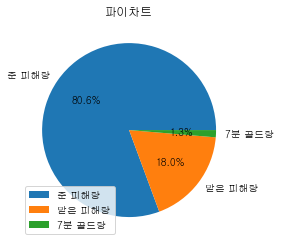

In [17]:
plt.figure()
plt.pie(group_df.loc['JUNGLE'], labels = ['준 피해량', '받은 피해량', '7분 골드량'], 
        shadow = False, autopct = '%1.1f%%', explode = (0,0,0))
plt.grid(True)
plt.legend(loc = 3)
plt.title('파이차트')

In [24]:
def calc_explod(x):
    x = x.values.tolist()
    max_idx = x.index(max(x))
    lsn = [0 for i in range(len(x))]
    lsn[max_idx] = 0.05
    return lsn

Text(0.5, 1.0, '파이차트')

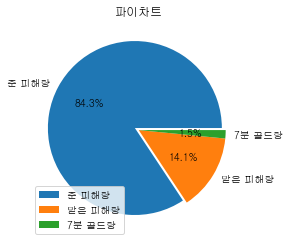

In [25]:
plt.figure()
plt.pie(group_df.loc['BOTTOM'], labels = ['준 피해량', '받은 피해량', '7분 골드량'], 
        shadow = False, autopct = '%1.1f%%', 
        explode = calc_explod(group_df.loc['BOTTOM']))
plt.grid(True)
plt.legend(loc = 3)
plt.title('파이차트')

In [27]:
my_tmp = tmp_df[['TEAMPOSITION', 'TOTALDAMAGEDEALT']]

In [29]:
my_tmp.set_index('TEAMPOSITION', inplace = True)

In [30]:
my_tmp

,TOTALDAMAGEDEALT
TEAMPOSITION,
JUNGLE,107997
TOP,121864
BOTTOM,91953
UTILITY,7896
MIDDLE,163783
...,...
JUNGLE,220240
MIDDLE,127907
TOP,151034


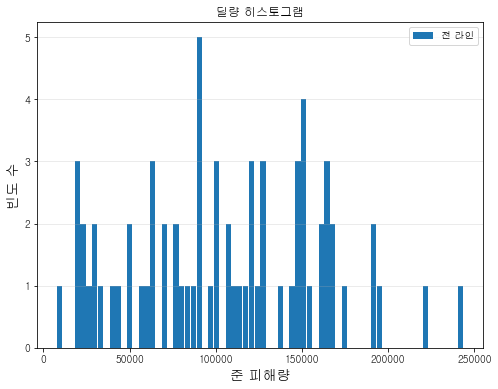

In [31]:
plt.figure(figsize = (8, 6))
plt.hist(my_tmp, bins = len(my_tmp), label = '전 라인', rwidth = 0.9)

plt.xlabel('준 피해량', size = 14)
plt.ylabel('빈도 수', size = 14)
plt.title('딜량 히스토그램')
plt.legend(loc = 'upper right')
plt.grid(axis = 'y', alpha = 0.3)

아나콘다 프롬포트 -> conda install seaborn

conda uninstall seaborn  
conda uninstall numpy  
conda uninstall scipy

conda remove --force scipy, numpy, seaborn

In [3]:
import seaborn as sns

In [12]:
url = 'http://openapi.seoul.go.kr:8088/635555674b61726f37305648774969/xml/GetParkInfo/1/5/'

In [13]:
df = df_creater(url)

In [14]:
df

,PARKING_NAME,ADDR,PARKING_CODE,PARKING_TYPE,PARKING_TYPE_NM,OPERATION_RULE,OPERATION_RULE_NM,TEL,CAPACITY,PAY_YN,...,TIME_RATE,ADD_RATES,ADD_TIME_RATE,BUS_RATES,BUS_TIME_RATE,BUS_ADD_TIME_RATE,BUS_ADD_RATES,DAY_MAXIMUM,LAT,LNG
0,초안산근린공원주차장(구),도봉구 창동 24-0,1010089,NW,노외 주차장,1,시간제 주차장,,71.0,Y,...,0.0,300.0,10.0,0.0,0.0,0.0,0.0,0.0,37.649279,127.040474
1,초안산근린공원주차장(구),도봉구 창동 24-0,1010089,NW,노외 주차장,1,시간제 주차장,,71.0,Y,...,0.0,300.0,10.0,0.0,0.0,0.0,0.0,0.0,37.649279,127.040474
2,마들스타디움(근린공원)(구),노원구 상계동 770-2,1012254,NW,노외 주차장,1,시간제 주차장,02-2289-6735,177.0,Y,...,5.0,150.0,5.0,0.0,0.0,0.0,0.0,11000.0,37.643917,127.058567
3,마들스타디움(근린공원)(구),노원구 상계동 770-2,1012254,NW,노외 주차장,1,시간제 주차장,02-2289-6735,177.0,Y,...,5.0,150.0,5.0,0.0,0.0,0.0,0.0,11000.0,37.643917,127.058567
4,마장동(건물) 공영주차장(구),성동구 마장동 463-2,1013181,NW,노외 주차장,1,시간제 주차장,02-2204-7970,54.0,Y,...,5.0,50.0,5.0,0.0,0.0,0.0,0.0,0.0,37.569939,127.035145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,을지로 공영주차장(시),중구 을지로3가 282-8,1367804,NS,노상 주차장,1,시간제 주차장,,1.0,Y,...,5.0,750.0,5.0,0.0,0.0,0.0,0.0,0.0,37.566397,126.991446
996,을지로 공영주차장(시),중구 을지로3가 282-8,1367804,NS,노상 주차장,1,시간제 주차장,,1.0,Y,...,5.0,750.0,5.0,0.0,0.0,0.0,0.0,0.0,37.566665,126.999797
997,을지로 공영주차장(시),중구 을지로3가 282-8,1367804,NS,노상 주차장,1,시간제 주차장,,1.0,Y,...,5.0,750.0,5.0,0.0,0.0,0.0,0.0,0.0,37.566392,126.994388
998,을지로 공영주차장(시),중구 을지로3가 282-8,1367804,NS,노상 주차장,1,시간제 주차장,,1.0,Y,...,5.0,750.0,5.0,0.0,0.0,0.0,0.0,0.0,37.566749,126.997575


In [15]:
my_df = df[['PARKING_NAME', 'CAPACITY', 'PAY_NM', 'SATURDAY_PAY_NM', 'HOLIDAY_PAY_NM'
           , 'FULLTIME_MONTHLY', 'RATES', 'ADD_RATES']]

In [16]:
my_df.columns = ['주자창명', '주차수', '유무료', '주말유무료', '공휴일유무료'
                 , '월정기권금액', '기본요금', '추가요금']

In [17]:
my_df = my_df.drop_duplicates()

In [18]:
my_df

,주자창명,주차수,유무료,주말유무료,공휴일유무료,월정기권금액,기본요금,추가요금
0,초안산근린공원주차장(구),71.0,유료,무료,무료,0,0.0,300.0
2,마들스타디움(근린공원)(구),177.0,유료,무료,무료,100000,150.0,150.0
4,마장동(건물) 공영주차장(구),54.0,유료,무료,무료,50000,50.0,50.0
6,영등포여고 공영(구),98.0,유료,무료,무료,65000,50.0,50.0
8,당산근린공원 공영(구),190.0,유료,무료,무료,100000,150.0,150.0
...,...,...,...,...,...,...,...,...
685,적선동 주차장(시),30.0,유료,무료,무료,0,340.0,340.0
687,해군본부앞 공영주차장(시),1.0,유료,무료,유료,,220.0,220.0
727,가산동 금천교 공영주차장(시),1.0,유료,무료,유료,0,200.0,200.0
766,당산고가밑 공영주차장(시),1.0,유료,무료,유료,,260.0,260.0


<AxesSubplot:title={'center':'주차장 유무료'}, xlabel='유무료', ylabel='count'>

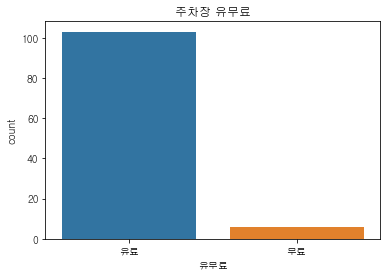

In [28]:
plt.figure()
plt.title('주차장 유무료')
sns.countplot(x = '유무료', data = my_df, order = ['유료', '무료'])

<AxesSubplot:title={'center':'기본요금 히스토그램'}, xlabel='기본요금', ylabel='Count'>

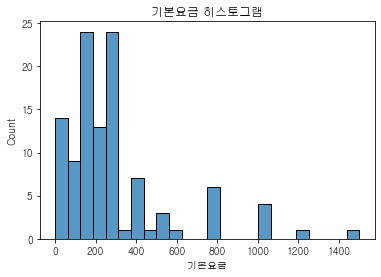

In [29]:
plt.figure()
plt.title('기본요금 히스토그램')
sns.histplot(x = my_df['기본요금'])

<AxesSubplot:xlabel='기본요금', ylabel='추가요금'>

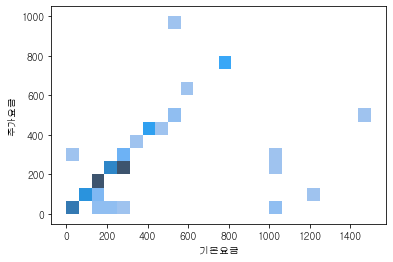

In [31]:
sns.histplot(x = my_df['기본요금'], y = my_df['추가요금'])

<AxesSubplot:xlabel='기본요금', ylabel='Density'>

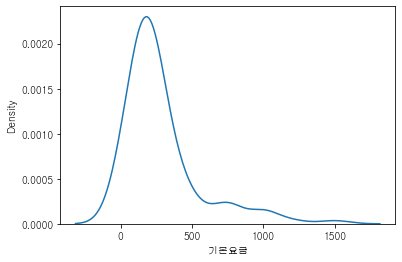

In [32]:
plt.figure()
sns.kdeplot(x = my_df['기본요금'])

In [6]:
db_open()
lol_df = sql_execute('select * from lol_stats')
db_close()

db_open!
db_close!


C:\Users\user\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


<AxesSubplot:xlabel='G_7', ylabel='Density'>

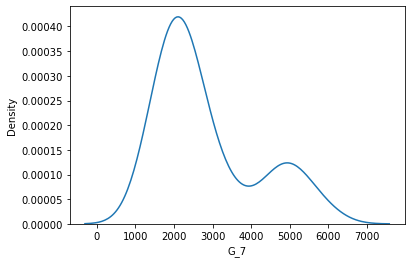

In [9]:
plt.figure()
sns.kdeplot(x = lol_df['G_7'])

<AxesSubplot:xlabel='G_7', ylabel='Density'>

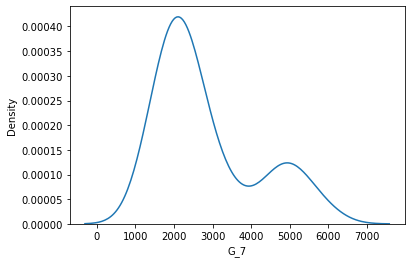

In [10]:
sns.kdeplot(x = lol_df[lol_df.G_7 != 0]['G_7'])

<AxesSubplot:xlabel='기본요금', ylabel='추가요금'>

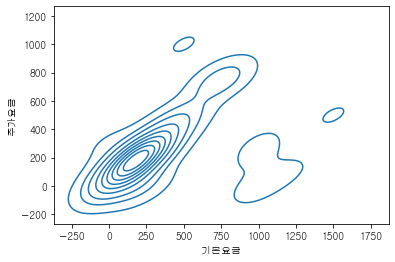

In [22]:
plt.figure()
sns.kdeplot(x = my_df['기본요금'], y = my_df['추가요금'])

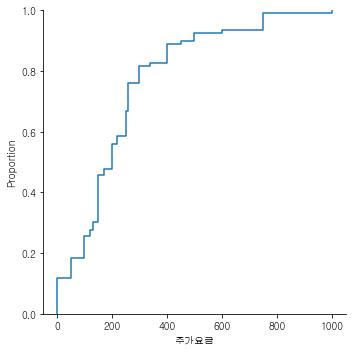

In [23]:
sns.displot(x = my_df['추가요금'], kind='ecdf')

<AxesSubplot:xlabel='기본요금', ylabel='Density'>

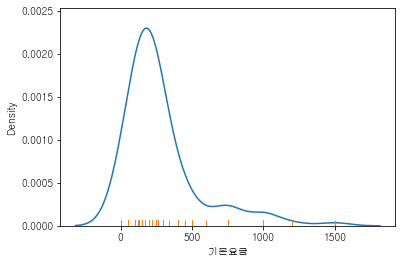

In [24]:
sns.kdeplot(x = my_df['기본요금'])
sns.rugplot(x = my_df['기본요금'])

<AxesSubplot:xlabel='주말유무료', ylabel='기본요금'>

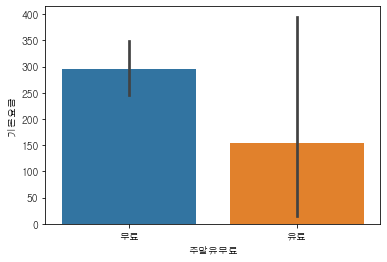

In [25]:
sns.barplot(x = my_df['주말유무료'], y = my_df['기본요금'])

<AxesSubplot:xlabel='주말유무료', ylabel='추가요금'>

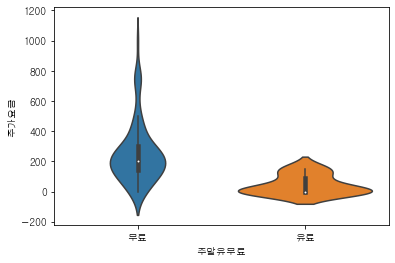

In [26]:
sns.violinplot(x = my_df['주말유무료'], y = my_df['추가요금'])

<AxesSubplot:xlabel='주말유무료', ylabel='추가요금'>

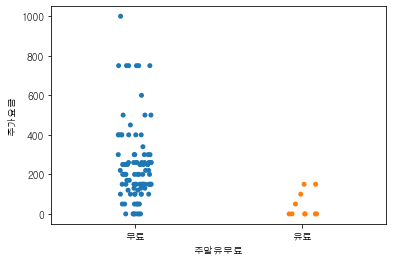

In [27]:
sns.stripplot(x = my_df['주말유무료'], y = my_df['추가요금'])

In [29]:
my_df.corr() #상관관계

,주차수,기본요금,추가요금
주차수,1.000000,-0.066379,-0.231136
기본요금,-0.066379,1.000000,0.560982
추가요금,-0.231136,0.560982,1.000000


<AxesSubplot:>

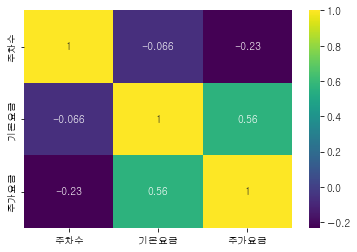

In [30]:
sns.heatmap(my_df.corr(), annot = True, cmap = 'viridis')

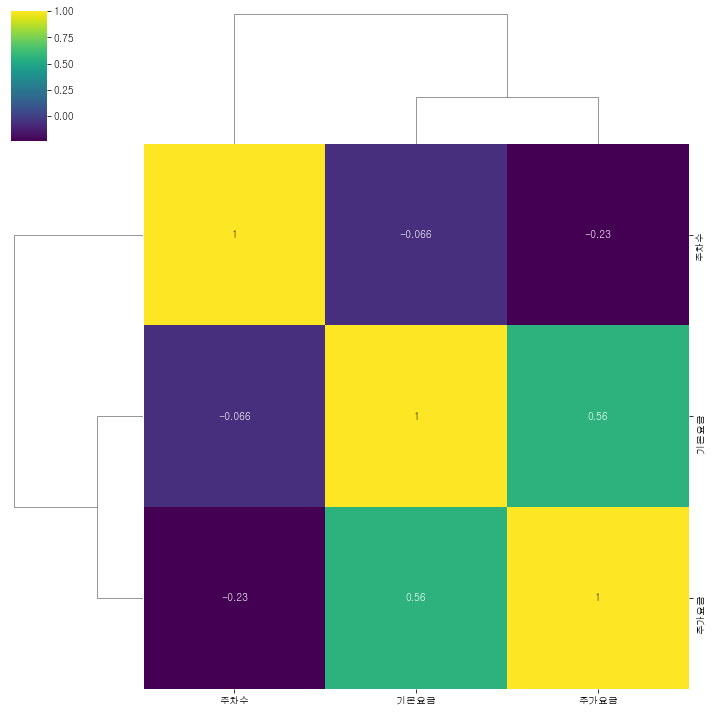

In [31]:
sns.clustermap(my_df.corr(), annot = True, cmap = 'viridis')

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

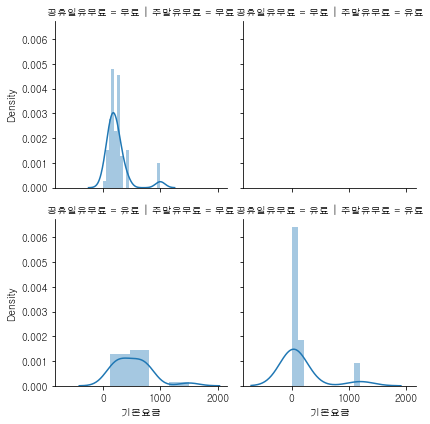

In [32]:
sns.FacetGrid(my_df, col = '주말유무료', row = '공휴일유무료').map(sns.distplot, '기본요금')

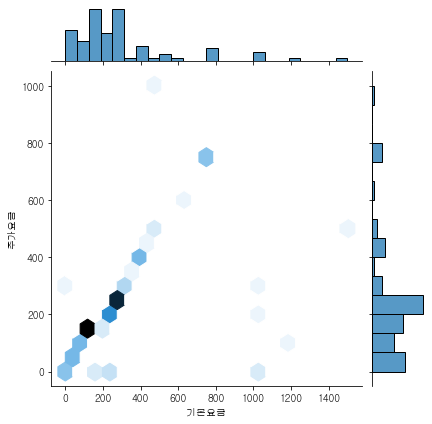

In [34]:
sns.jointplot(x = my_df['기본요금'], y = my_df['추가요금'], kind = 'hex')

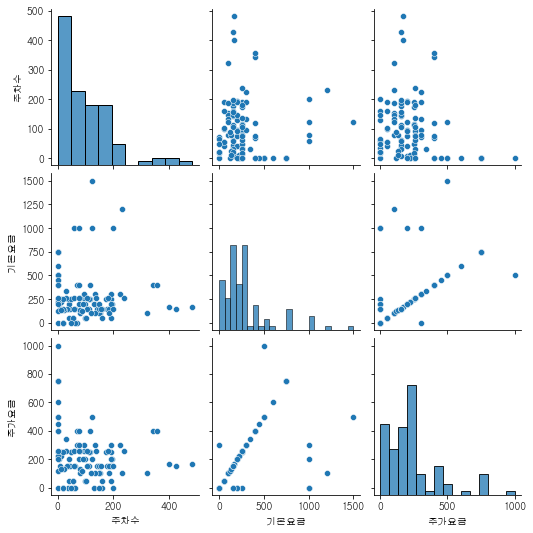

In [35]:
sns.pairplot(my_df)

<AxesSubplot:xlabel='기본요금', ylabel='추가요금'>

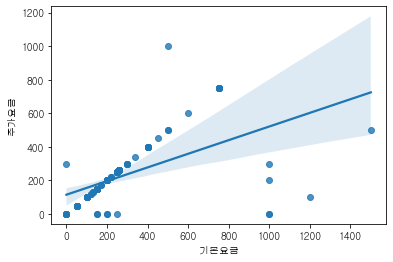

In [36]:
sns.regplot(x = '기본요금', y = '추가요금', data = my_df)

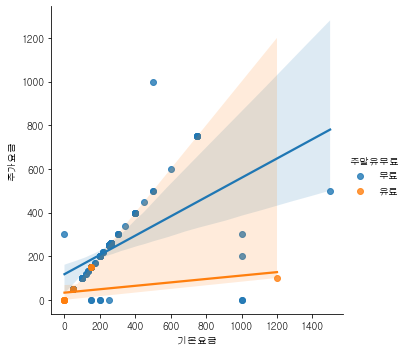

In [37]:
sns.lmplot(x = '기본요금', y = '추가요금', data = my_df, hue = '주말유무료')

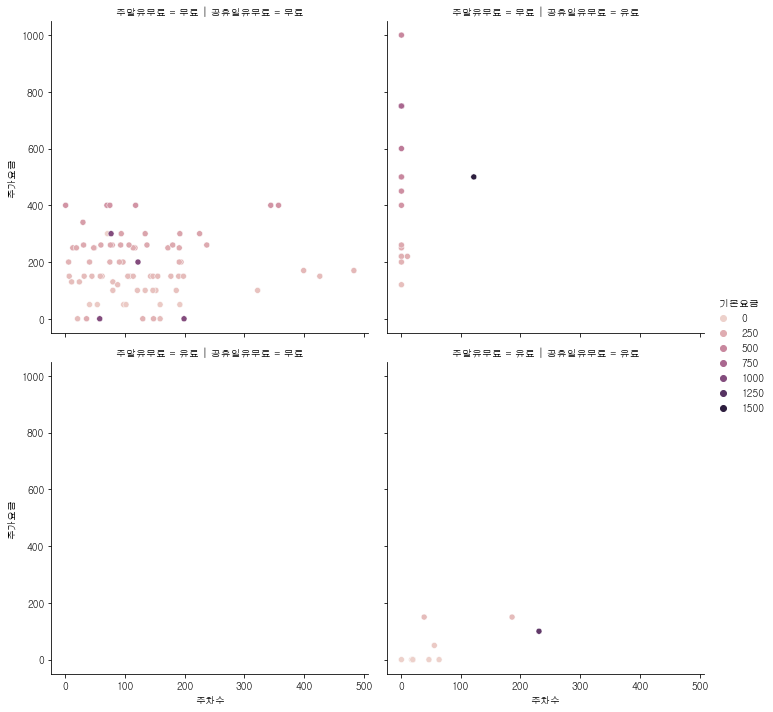

In [39]:
sns.relplot(x = '주차수', y = '추가요금', hue = '기본요금', row = '주말유무료', col = '공휴일유무료', data = my_df)

아나콘다 프롬포트 -> pip install plotly

In [55]:
url = "https://api.upbit.com/v1/candles/days"
coin_lst = ['KRW-BTC','KRW-ETH','KRW-XRP']
headers = {"Accept": "application/json"}
df = pd.DataFrame()
for c in coin_lst:
    querystring = {"market":c, "count":"200"}
    response = requests.request("GET", url, headers=headers, params=querystring)
    df = df.append(pd.DataFrame(response.json()))

C:\Users\user\AppData\Local\Temp\ipykernel_5816\2492045562.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\user\AppData\Local\Temp\ipykernel_5816\2492045562.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\user\AppData\Local\Temp\ipykernel_5816\2492045562.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [48]:
df

,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,prev_closing_price,change_price,change_rate
0,KRW-BTC,2022-07-04T00:00:00,2022-07-04T09:00:00,25454000.0,25467000.0,25150000.0,25212000.0,1656910020754,3.226344e+10,1.275211e+03,25422000.0,-210000.0,-0.008261
1,KRW-BTC,2022-07-03T00:00:00,2022-07-03T09:00:00,25465000.0,25870000.0,25000000.0,25422000.0,1656892799474,1.016357e+11,4.004473e+03,25463000.0,-41000.0,-0.001610
2,KRW-BTC,2022-07-02T00:00:00,2022-07-02T09:00:00,25576000.0,25700000.0,25180000.0,25463000.0,1656806399522,9.122699e+10,3.585127e+03,25556000.0,-93000.0,-0.003639
3,KRW-BTC,2022-07-01T00:00:00,2022-07-01T09:00:00,25999000.0,27110000.0,25100000.0,25556000.0,1656719999317,2.763730e+11,1.066707e+04,26003000.0,-447000.0,-0.017190
4,KRW-BTC,2022-06-30T00:00:00,2022-06-30T09:00:00,26572000.0,26609000.0,24776000.0,26003000.0,1656633599755,2.925429e+11,1.147834e+04,26548000.0,-545000.0,-0.020529
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,KRW-XRP,2021-12-21T00:00:00,2021-12-21T09:00:00,1090.0,1180.0,1050.0,1160.0,1640131197810,4.132378e+11,3.743888e+08,1090.0,70.0,0.064220
196,KRW-XRP,2021-12-20T00:00:00,2021-12-20T09:00:00,1040.0,1135.0,1030.0,1090.0,1640044799825,6.379693e+11,5.910902e+08,1040.0,50.0,0.048077
197,KRW-XRP,2021-12-19T00:00:00,2021-12-19T09:00:00,1025.0,1055.0,1025.0,1040.0,1639958399505,1.522162e+11,1.468964e+08,1025.0,15.0,0.014634
198,KRW-XRP,2021-12-18T00:00:00,2021-12-18T09:00:00,1000.0,1040.0,996.0,1025.0,1639871999805,1.392812e+11,1.368503e+08,1000.0,25.0,0.025000


In [42]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected = True)

In [57]:
df['candle_date_time_utc'] = df['candle_date_time_utc'].str[:10]
df['candle_date_time_kst'] = df['candle_date_time_kst'].str[:10]


In [58]:
df['market'] = df['market'].str[4:]

In [59]:
df

,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,prev_closing_price,change_price,change_rate
0,BTC,2022-07-04,2022-07-04,25454000.0,25467000.0,25150000.0,25236000.0,1656910460125,3.256036e+10,1.286980e+03,25422000.0,-186000.0,-0.007316
1,BTC,2022-07-03,2022-07-03,25465000.0,25870000.0,25000000.0,25422000.0,1656892799474,1.016357e+11,4.004473e+03,25463000.0,-41000.0,-0.001610
2,BTC,2022-07-02,2022-07-02,25576000.0,25700000.0,25180000.0,25463000.0,1656806399522,9.122699e+10,3.585127e+03,25556000.0,-93000.0,-0.003639
3,BTC,2022-07-01,2022-07-01,25999000.0,27110000.0,25100000.0,25556000.0,1656719999317,2.763730e+11,1.066707e+04,26003000.0,-447000.0,-0.017190
4,BTC,2022-06-30,2022-06-30,26572000.0,26609000.0,24776000.0,26003000.0,1656633599755,2.925429e+11,1.147834e+04,26548000.0,-545000.0,-0.020529
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,XRP,2021-12-21,2021-12-21,1090.0,1180.0,1050.0,1160.0,1640131197810,4.132378e+11,3.743888e+08,1090.0,70.0,0.064220
196,XRP,2021-12-20,2021-12-20,1040.0,1135.0,1030.0,1090.0,1640044799825,6.379693e+11,5.910902e+08,1040.0,50.0,0.048077
197,XRP,2021-12-19,2021-12-19,1025.0,1055.0,1025.0,1040.0,1639958399505,1.522162e+11,1.468964e+08,1025.0,15.0,0.014634
198,XRP,2021-12-18,2021-12-18,1000.0,1040.0,996.0,1025.0,1639871999805,1.392812e+11,1.368503e+08,1000.0,25.0,0.025000


In [90]:
df[df.market == 'ETH']

,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,prev_closing_price,change_price,change_rate
0,ETH,2022-07-04,2022-07-04,1416000.0,1418000.0,1383500.0,1389500.0,1656910460639,1.694926e+10,12112.681342,1416000.0,-26500.0,-0.018715
1,ETH,2022-07-03,2022-07-03,1409500.0,1433500.0,1381500.0,1416000.0,1656892795842,5.332819e+10,37904.049465,1409500.0,6500.0,0.004612
2,ETH,2022-07-02,2022-07-02,1405000.0,1424000.0,1364000.0,1409500.0,1656806399499,5.851793e+10,42066.223246,1403500.0,6000.0,0.004275
3,ETH,2022-07-01,2022-07-01,1398500.0,1450000.0,1365000.0,1403500.0,1656719999756,1.422083e+11,101323.792207,1400500.0,3000.0,0.002142
4,ETH,2022-06-30,2022-06-30,1453000.0,1462000.0,1331500.0,1400500.0,1656633596323,1.385134e+11,100591.494763,1453000.0,-52500.0,-0.036132
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ETH,2021-12-21,2021-12-21,4866000.0,4996000.0,4818000.0,4936000.0,1640131199860,2.394508e+11,48674.267021,4866000.0,70000.0,0.014386
196,ETH,2021-12-20,2021-12-20,4899000.0,4947000.0,4700000.0,4866000.0,1640044799939,2.557547e+11,53342.442067,4899000.0,-33000.0,-0.006736
197,ETH,2021-12-19,2021-12-19,4932000.0,4999000.0,4865000.0,4899000.0,1639958399598,1.723996e+11,35030.382373,4933000.0,-34000.0,-0.006892
198,ETH,2021-12-18,2021-12-18,4869000.0,4964000.0,4734000.0,4933000.0,1639871999370,1.799115e+11,36916.428194,4872000.0,61000.0,0.012521


In [74]:
import plotly.express as px

In [77]:
plotly.offline.iplot({
    "data":[go.Scatter(x=[1,2,3,4], y=[4,3,2,1])],
    "layout":go.Layout(title="hello world")
})

In [87]:
fig = px.scatter(df[df.market == 'XRP'],
                x = 'candle_date_time_kst',
                y = 'trade_price')
plotly.offline.iplot(fig)

In [89]:
fig = px.scatter(df,
                x = 'candle_date_time_kst',
                y = 'candle_acc_trade_price',
                color = 'market')
plotly.offline.iplot(fig)